In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

In [38]:
df=pd.read_csv("HousePrices2.csv")

In [39]:
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
df.isnull().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

In [41]:
for c in df.columns:
    per=df[c].isnull().sum()/len(df[c])*100
    print(c , "=", per,"%")
    if per>20:
        df.drop(c,axis=1,inplace=True)
               
         
    

Id = 0.0 %
Dwell_Type = 0.0 %
Zone_Class = 0.0 %
LotFrontage = 15.436565364206464 %
LotArea = 0.0 %
Road_Type = 0.0 %
Alley = 93.77713458755427 %
Property_Shape = 0.0 %
LandContour = 0.0 %
Utilities = 0.0 %
LotConfig = 0.0 %
LandSlope = 0.0 %
Neighborhood = 0.0 %
Condition1 = 0.0 %
Condition2 = 0.0 %
Dwelling_Type = 0.0 %
HouseStyle = 0.0 %
OverallQual = 0.0 %
OverallCond = 0.0 %
YearBuilt = 0.0 %
YearRemodAdd = 0.0 %
RoofStyle = 0.0 %
RoofMatl = 0.0 %
Exterior1st = 0.0 %
Exterior2nd = 0.0 %
MasVnrType = 0.6753497346840328 %
MasVnrArea = 0.6753497346840328 %
ExterQual = 0.0 %
ExterCond = 0.0 %
Foundation = 0.0 %
BsmtQual = 2.846116739025567 %
BsmtCond = 2.846116739025567 %
BsmtExposure = 2.942595272551857 %
BsmtFinType1 = 2.846116739025567 %
BsmtFinSF1 = 0.0 %
BsmtFinType2 = 2.894356005788712 %
BsmtFinSF2 = 0.0 %
BsmtUnfSF = 0.0 %
TotalBsmtSF = 0.0 %
Heating = 0.0 %
HeatingQC = 0.0 %
CentralAir = 0.0 %
Electrical = 0.0482392667631452 %
1stFlrSF = 0.0 %
2ndFlrSF = 0.0 %
LowQualFinSF = 0

<AxesSubplot:>

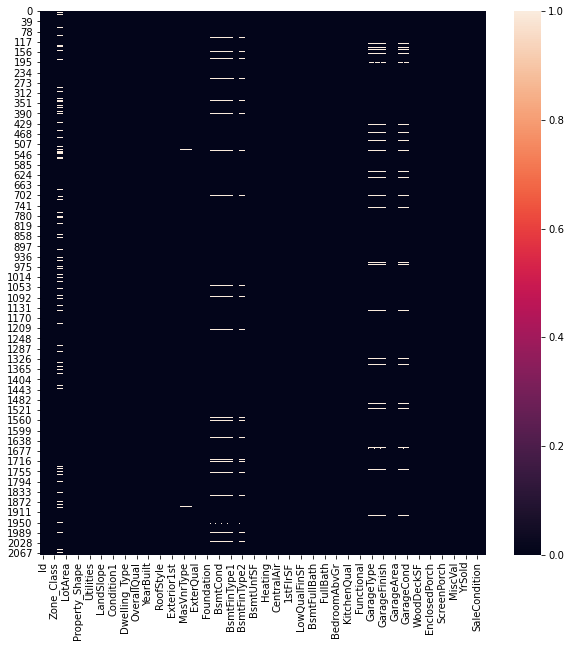

In [42]:
plt.figure(figsize=([10,10]))
sns.heatmap(df.isnull())

In [62]:
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [43]:
prof

NameError: name 'prof' is not defined

In [44]:
df.shape

(2073, 76)

In [45]:
print(81-76)



5


<AxesSubplot:>

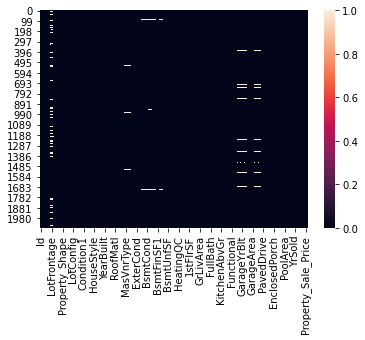

In [46]:
sns.heatmap(df.isnull())

In [47]:
for c in df.columns:
    per=df[c].isnull().sum()/len(df[c])*100
    print(c , "=", per,"%")

Id = 0.0 %
Dwell_Type = 0.0 %
Zone_Class = 0.0 %
LotFrontage = 15.436565364206464 %
LotArea = 0.0 %
Road_Type = 0.0 %
Property_Shape = 0.0 %
LandContour = 0.0 %
Utilities = 0.0 %
LotConfig = 0.0 %
LandSlope = 0.0 %
Neighborhood = 0.0 %
Condition1 = 0.0 %
Condition2 = 0.0 %
Dwelling_Type = 0.0 %
HouseStyle = 0.0 %
OverallQual = 0.0 %
OverallCond = 0.0 %
YearBuilt = 0.0 %
YearRemodAdd = 0.0 %
RoofStyle = 0.0 %
RoofMatl = 0.0 %
Exterior1st = 0.0 %
Exterior2nd = 0.0 %
MasVnrType = 0.6753497346840328 %
MasVnrArea = 0.6753497346840328 %
ExterQual = 0.0 %
ExterCond = 0.0 %
Foundation = 0.0 %
BsmtQual = 2.846116739025567 %
BsmtCond = 2.846116739025567 %
BsmtExposure = 2.942595272551857 %
BsmtFinType1 = 2.846116739025567 %
BsmtFinSF1 = 0.0 %
BsmtFinType2 = 2.894356005788712 %
BsmtFinSF2 = 0.0 %
BsmtUnfSF = 0.0 %
TotalBsmtSF = 0.0 %
Heating = 0.0 %
HeatingQC = 0.0 %
CentralAir = 0.0 %
Electrical = 0.0482392667631452 %
1stFlrSF = 0.0 %
2ndFlrSF = 0.0 %
LowQualFinSF = 0.0 %
GrLivArea = 0.0 %
BsmtF

In [48]:
df["LotFrontage"]=df["LotFrontage"].fillna(df["LotFrontage"]).mean()

In [49]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wood

In [50]:
df["BsmtCond"]=df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])

In [51]:
df["BsmtQual"]=df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])

In [52]:
df["GarageType"]=df["GarageType"].fillna(df["GarageType"].mode()[0])

In [53]:
df.drop("GarageYrBlt",axis=1,inplace=True)

In [54]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [55]:
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])

In [56]:
df["GarageCond"]=df["GarageCond"].fillna(df["GarageCond"].mode()[0])

In [57]:
df.drop("Id",axis=1,inplace=True)

In [58]:
df.isnull().sum()

Dwell_Type             0
Zone_Class             0
LotFrontage            0
LotArea                0
Road_Type              0
                      ..
MoSold                 0
YrSold                 0
SaleType               0
SaleCondition          0
Property_Sale_Price    0
Length: 74, dtype: int64

In [59]:
df.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,72.056475,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,72.056475,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,72.056475,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,72.056475,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,72.056475,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [30]:

pd.set_option('display.max_columns', None)
df.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,72.056475,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,72.056475,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,72.056475,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,72.056475,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,72.056475,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [71]:
df["Dwell_Type"].unique()

array([  60,   20,   70,   50,  190,   45,   90,  120,   30,   85,   80,
        160,   75,  180,   40,  150,  303, 7080], dtype=int64)

In [75]:
df.describe()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,1960.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,344.745779,6.168355,1517.011095,0.429329,0.056440,1.571635,0.378678,2.874096,1.052581,6.540280,0.602026,1980.418367,1.775687,474.683068,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,438.844748,49.553967,517.236428,0.522605,0.237015,0.545963,0.499873,0.816144,0.237901,1.629673,0.633931,24.158327,0.741976,212.284955,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,730.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2019.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [76]:
df.corr()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
Dwell_Type,1.000000,-0.075636,-0.033609,0.046278,0.033023,0.027194,0.042864,-0.004832,-0.034072,-0.025699,-0.022296,-0.068557,-0.078372,0.101374,0.004985,0.029368,-0.016284,-0.004521,0.056762,0.066188,-0.005343,0.074835,0.019444,-0.031639,0.044238,-0.001193,-0.013785,0.004620,0.002153,-0.006529,-0.011966,-0.012021,0.001625,-0.003942,-0.020589,0.018891,-0.017399
LotFrontage,-0.075636,1.000000,0.311156,0.108095,-0.011213,0.092680,0.101034,0.129620,0.139424,0.062472,0.112684,0.284690,0.357239,0.070194,0.023235,0.320638,0.087222,-0.037956,0.176271,0.048311,0.228194,0.006560,0.294922,0.226642,0.067647,0.233973,0.269121,0.082081,0.106846,-0.002309,0.042993,0.021500,0.124087,-0.005094,0.025110,0.025584,0.279836
LotArea,-0.033609,0.311156,1.000000,0.078232,0.014209,-0.010551,0.017766,0.064370,0.164989,0.075875,0.000127,0.200794,0.244940,0.036583,-0.001199,0.209442,0.126283,0.031688,0.097835,0.003932,0.107307,-0.008350,0.155519,0.211193,-0.022035,0.128792,0.144898,0.121530,0.064376,-0.023199,0.010594,0.035370,0.062458,0.030949,-0.001707,-0.006478,0.211572
OverallQual,0.046278,0.108095,0.078232,1.000000,-0.010092,0.335326,0.379579,0.283981,0.163501,-0.058146,0.197844,0.354046,0.308402,0.209623,-0.013395,0.401340,0.084128,-0.047402,0.382428,0.190106,0.059223,-0.111588,0.272410,0.255236,0.381405,0.399407,0.373203,0.155307,0.217044,-0.080219,0.000451,0.021561,0.045138,-0.034206,0.033685,-0.021130,0.523553
OverallCond,0.033023,-0.011213,0.014209,-0.010092,1.000000,-0.245303,0.084102,-0.083282,-0.035849,0.027023,-0.098924,-0.130098,-0.087931,0.013921,-0.009863,-0.053220,-0.029309,0.048357,-0.116006,-0.040809,-0.010460,-0.019415,-0.034231,-0.031404,-0.147551,-0.113676,-0.084758,0.013854,-0.042208,0.044501,0.017358,0.012021,-0.016993,0.041833,-0.025281,0.035050,-0.049926
YearBuilt,0.027194,0.092680,-0.010551,0.335326,-0.245303,1.000000,0.536129,0.263968,0.207941,-0.027220,0.118779,0.329629,0.235759,0.014821,-0.180458,0.167113,0.141150,-0.017865,0.399802,0.194491,-0.057069,-0.143619,0.080751,0.135165,0.721961,0.456665,0.406962,0.180472,0.179935,-0.322195,0.034056,-0.049156,0.005788,-0.038620,0.027765,-0.006211,0.437662
YearRemodAdd,0.042864,0.101034,0.017766,0.379579,0.084102,0.536129,1.000000,0.166549,0.101401,-0.073927,0.198201,0.283802,0.224185,0.136079,-0.085126,0.270691,0.101714,-0.012083,0.422568,0.180755,-0.037185,-0.128308,0.173802,0.106243,0.647469,0.393252,0.336030,0.182932,0.221604,-0.177739,0.039945,-0.036832,-0.009607,-0.011749,0.033514,0.058932,0.475565
MasVnrArea,-0.004832,0.129620,0.064370,0.283981,-0.083282,0.263968,0.166549,1.000000,0.238535,-0.079737,0.124202,0.346359,0.321517,0.191169,-0.071056,0.388811,0.075338,0.026707,0.281699,0.204664,0.102271,-0.054222,0.275450,0.276028,0.241176,0.356654,0.361222,0.123340,0.141377,-0.097651,0.029774,0.063607,0.002936,-0.035352,-0.017798,0.020028,0.482038
BsmtFinSF1,-0.034072,0.139424,0.164989,0.163501,-0.035849,0.207941,0.101401,0.238535,1.000000,-0.060739,-0.508612,0.485476,0.399249,-0.127193,-0.071539,0.176213,0.638649,0.079832,0.040933,0.014429,-0.130357,-0.090372,0.010932,0.220218,0.139292,0.195292,0.258896,0.207229,0.107593,-0.089326,0.045092,0.046826,0.099504,-0.001520,-0.019242,0.030208,0.373276
BsmtFinSF2,-0.025699,0.062472,0.075875,-0.058146,0.027023,-0.027220,-0.073927,-0.079737,-0.060739,1.000000,-0.205860,0.106318,0.093606,-0.117249,-0.003688,-0.031610,0.170176,0.067096,-0.094622,-0.047104,-0.020047,-0.043127,-0.048872,0.039578,-0.082279,-0.042863,-0.020975,0.073748,-0.001699,0.058107,-0.030341,0.099569,0.027055,-0.002205,-0.016562,0.025510,-0.029042


<AxesSubplot:>

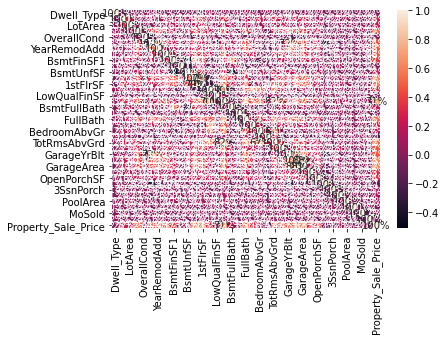

In [77]:
sns.heatmap(df.corr(),annot=True,fmt=".0%")

In [64]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

Dwell_Type             0
Zone_Class             0
LotFrontage            0
LotArea                0
Road_Type              0
Property_Shape         0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
Dwelling_Type          0
HouseStyle             0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             0
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual               0
BsmtCond               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtFinType2           0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0
HeatingQC              0
CentralAir             0


In [62]:
df.shape

(2073, 74)

In [63]:
df.dropna(inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996 entries, 0 to 2072
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           1996 non-null   int64  
 1   Zone_Class           1996 non-null   object 
 2   LotFrontage          1996 non-null   float64
 3   LotArea              1996 non-null   int64  
 4   Road_Type            1996 non-null   object 
 5   Property_Shape       1996 non-null   object 
 6   LandContour          1996 non-null   object 
 7   Utilities            1996 non-null   object 
 8   LotConfig            1996 non-null   object 
 9   LandSlope            1996 non-null   object 
 10  Neighborhood         1996 non-null   object 
 11  Condition1           1996 non-null   object 
 12  Condition2           1996 non-null   object 
 13  Dwelling_Type        1996 non-null   object 
 14  HouseStyle           1996 non-null   object 
 15  OverallQual          1996 non-null   i

In [73]:
strr=[]
for col in df.columns:
    if df[col].dtype=="object":
        strr.append(col)
        

In [76]:
enc=LabelEncoder()

In [77]:
for col in

array([37, 31, 30, 24, 36, 26, 25, 28,  6,  7,  8, 22, 33, 32, 12, 13, 27,
       11, 10, 14,  4,  0,  1,  2,  3, 20, 21,  5,  9, 23, 15, 19, 17, 18,
       16, 29, 35, 34], dtype=int64)

In [79]:
for col in strr:
    df[col]=enc.fit_transform(df[col])

In [80]:
df.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,3,72.056475,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,11,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,0,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,72.056475,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,7,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,0,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,72.056475,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,11,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,0,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,72.056475,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,12,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,0,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,72.056475,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,11,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,0,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [87]:
x=df.drop("Property_Sale_Price",axis=1)

In [88]:
y=df["Property_Sale_Price"]

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.3)

In [90]:
model=LinearRegression()

In [92]:
model.fit(x_train,y_train)

LinearRegression()

In [93]:
y_pred=model.predict(x_test)

In [97]:
import numpy as np

In [98]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 20990.03
Mean squared error = 1595283852.82
Median absolute error = 14652.9
Explain variance score = 0.76
R2 score = 0.76


In [103]:
print(np.sqrt(round(sm.mean_squared_error(y_test, y_pred), 2)))

39941.00465461529
